<a href="https://colab.research.google.com/github/AliConda/AliConda/blob/main/Model_1__IZO_ANN_Spectra_ratio_fraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_raw=pd.read_excel('IZO_zeroed and scaled sum.xlsx')
df_reserve=pd.read_excel('Full_IZO_spectral_ann.xlsx')

In [ ]:
df_raw.head(3)

,Unnamed: 0,195,195.2,195.4,195.6,195.8,196,196.2,196.4,196.6,196.8,197,197.2,197.4,197.6,197.8,198,198.2,198.4,198.6,198.8,199,199.2,199.4,199.6,199.8,200,200.2,200.4,200.6,200.8,201,201.2,201.4,201.6,201.8,202,202.2,202.4,202.6,...,1097.2,1097.4,1097.6,1097.8,1098,1098.2,1098.4,1098.6,1098.8,1099,1099.2,1099.4,1099.6,1099.8,1100,1100.2,1100.4,1100.6,1100.8,1101,1101.2,1101.4,1101.6,1101.8,1102,1102.2,1102.4,1102.6,1102.8,1103,1103.2,1103.4,1103.6,1103.8,1104,1104.2,1104.4,1104.6,1104.8,sum
0,0,0,0.000002,6.339045e-07,0.000000,0.0,0,0.0,0.0,0.000000,0.000000,0.000000,6.995184e-07,0.000003,0.000008,0.000014,0.000018,0.000014,9.434174e-06,4.883140e-06,0.000002,0.0,0,0.0,0.000002,3.138990e-06,9.822319e-07,0.0,0,0,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,1.604555e-07,0.0,0,...,0,0,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0.000000,0.000000e+00,0.000000,0.0,0,0.0,0.0,0.000001,0.000006,0.000005,4.400519e-06,0.000004,0.000006,0.000008,0.000009,0.000005,2.217574e-07,0.000000e+00,0.000000,0.0,0,0.0,0.000000,5.029072e-07,0.000000e+00,0.0,0,0,6.303286e-08,0.000002,0.000002,0.000001,4.746836e-07,0.0,0.0,0.000000e+00,0.0,0,...,0,0,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,0,0.000004,4.009876e-06,0.000003,0.0,0,0.0,0.0,0.000000,0.000003,0.000004,5.331071e-06,0.000006,0.000009,0.000012,0.000014,0.000010,5.345027e-06,9.396877e-07,0.000000,0.0,0,0.0,0.000005,1.084514e-05,6.023756e-06,0.0,0,0,0.000000e+00,0.000000,0.000001,0.000002,2.889537e-06,0.0,0.0,0.000000e+00,0.0,0,...,0,0,0.000001,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_raw.shape

(113, 4552)

In [ ]:
df_raw=df_raw.drop('sum',axis=1)


In [ ]:
df_raw['sheet']=df_reserve['sheet']

In [ ]:
df_raw.shape

(113, 4552)

In [ ]:
#df_raw.to_excel('IZO_zeroed and sum.xlsx')

In [ ]:
#df_raw.iloc[0,4550]
df_raw.head(3)

,Unnamed: 0,195,195.2,195.4,195.6,195.8,196,196.2,196.4,196.6,196.8,197,197.2,197.4,197.6,197.8,198,198.2,198.4,198.6,198.8,199,199.2,199.4,199.6,199.8,200,200.2,200.4,200.6,200.8,201,201.2,201.4,201.6,201.8,202,202.2,202.4,202.6,...,1097.2,1097.4,1097.6,1097.8,1098,1098.2,1098.4,1098.6,1098.8,1099,1099.2,1099.4,1099.6,1099.8,1100,1100.2,1100.4,1100.6,1100.8,1101,1101.2,1101.4,1101.6,1101.8,1102,1102.2,1102.4,1102.6,1102.8,1103,1103.2,1103.4,1103.6,1103.8,1104,1104.2,1104.4,1104.6,1104.8,sheet
0,0,0,0.000002,6.339045e-07,0.000000,0.0,0,0.0,0.0,0.000000,0.000000,0.000000,6.995184e-07,0.000003,0.000008,0.000014,0.000018,0.000014,9.434174e-06,4.883140e-06,0.000002,0.0,0,0.0,0.000002,3.138990e-06,9.822319e-07,0.0,0,0,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,1.604555e-07,0.0,0,...,0,0,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.0
1,1,0,0.000000,0.000000e+00,0.000000,0.0,0,0.0,0.0,0.000001,0.000006,0.000005,4.400519e-06,0.000004,0.000006,0.000008,0.000009,0.000005,2.217574e-07,0.000000e+00,0.000000,0.0,0,0.0,0.000000,5.029072e-07,0.000000e+00,0.0,0,0,6.303286e-08,0.000002,0.000002,0.000001,4.746836e-07,0.0,0.0,0.000000e+00,0.0,0,...,0,0,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.0
2,2,0,0.000004,4.009876e-06,0.000003,0.0,0,0.0,0.0,0.000000,0.000003,0.000004,5.331071e-06,0.000006,0.000009,0.000012,0.000014,0.000010,5.345027e-06,9.396877e-07,0.000000,0.0,0,0.0,0.000005,1.084514e-05,6.023756e-06,0.0,0,0,0.000000e+00,0.000000,0.000001,0.000002,2.889537e-06,0.0,0.0,0.000000e+00,0.0,0,...,0,0,0.000001,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.0


In [ ]:
#df_raw.to_excel('IZO_zeroed and scaled sum.xlsx')

In [ ]:
df_raw.shape

(113, 4552)

In [ ]:
X=df_raw.iloc[:,:-1].values
y=df_raw.iloc[:,-1].values

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc_s=StandardScaler()
sc_m=StandardScaler()

In [ ]:
y=y.reshape(113,1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
X_train=sc_s.fit_transform(X_train)
X_test=sc_s.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:

model=Sequential()

In [ ]:
model.add(Dense(units=9000,activation='relu'))

#model.add(Dense(units=9000,activation='relu'))
#model.add(Dense(units=15000,activation='relu'))
model.add(Dense(units=1000,activation='relu'))
#model.add(Dense(units=1000,activation='relu'))
model.add(Dense(units=500,activation='relu'))
#model.add(Dense(units=300,activation='relu'))
model.add(Dense(units=300,activation='relu'))
#model.add(Dense(units=100,activation='relu'))
model.add(Dense(units=50,activation='relu'))
#model.add(Dense(units=20,activation='relu'))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=4,activation='relu'))
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.Huber(),
              metrics=['mae'])

In [ ]:
model.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 31ms/step - loss: 1393.7889 - mae: 1394.2740
Epoch 2/100
3/3 [==============================] - 0s 31ms/step - loss: 11.8674 - mae: 12.3586
Epoch 3/100
3/3 [==============================] - 0s 28ms/step - loss: 5.8664 - mae: 6.3561
Epoch 4/100
3/3 [==============================] - 0s 30ms/step - loss: 4.3438 - mae: 4.8426
Epoch 5/100
3/3 [==============================] - 0s 29ms/step - loss: 3.2001 - mae: 3.6738
Epoch 6/100
3/3 [==============================] - 0s 28ms/step - loss: 2.9672 - mae: 3.4403
Epoch 7/100
3/3 [==============================] - 0s 24ms/step - loss: 3.6090 - mae: 4.0716
Epoch 8/100
3/3 [==============================] - 0s 26ms/step - loss: 2.5291 - mae: 3.0114
Epoch 9/100
3/3 [==============================] - 0s 24ms/step - loss: 2.9355 - mae: 3.4147
Epoch 10/100
3/3 [==============================] - 0s 28ms/step - loss: 3.0913 - mae: 3.5735
Epoch 11/100
3/3 [==============================] - 0s 24ms/s

In [ ]:
#losses=pd.DataFrame(model.history.history)
#losses.plot()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred.shape

(23, 1)

In [ ]:
y_test.shape

(23, 1)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mean_absolute_error(y_pred,y_test)

1.0564035311989162

In [ ]:
results=np.concatenate((y_pred,y_test),1)

results_ann_peak_ratio=pd.DataFrame(results,columns=['y_pred','y_test'])

results_ann_peak_ratio.head(50)

,y_pred,y_test
0,8.307530,9.6
1,7.315670,10.0
2,9.829968,11.4
3,9.253780,11.0
4,11.357098,11.4
5,9.351959,9.6
6,7.492270,7.5
7,9.181125,10.0
8,10.065929,9.8
9,12.331610,13.5


In [ ]:
from sklearn import metrics
metrics.explained_variance_score(y_test,y_pred)



0.05182776686819701

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 9000)              40968000  
_________________________________________________________________
dense_9 (Dense)              (None, 1000)              9001000   
_________________________________________________________________
dense_10 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_11 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_12 (Dense)             (None, 50)                15050     
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 408       
_________________________________________________________________
dense_14 (Dense)             (None, 4)                

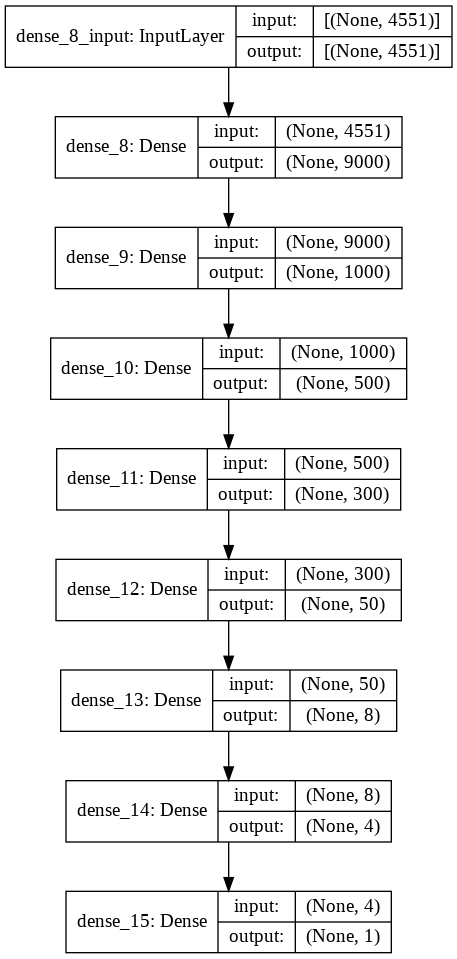

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

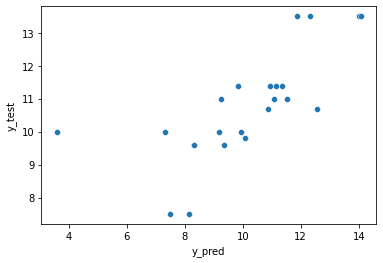

In [ ]:
results=np.concatenate((y_pred,y_test),1)

results_ann_peak_ratio=pd.DataFrame(results,columns=['y_pred','y_test'])

#results_ann_peak_ratio.head(50)
import seaborn as sns

sns.scatterplot(x='y_pred',y='y_test',data=results_ann_peak_ratio)